# Business Understanding


##### We are developing critical insights from the  aviation accidents and incidents to help the aviation industry which includes airlines & aircraft manufacturers, aviation safety organizations use this data to assess risk, improve safety protocols, and develop preventative measures.

# Problem Understanding

#### There has been increased accidents in the aviation world. This may have been to human error, mechanical failure, and weather conditions.

# Objectives

#### To understand the broader patterns in accident frequency to help focus safety efforts on critical periods or years of higher risk.
#### 1. To identify countries with the highest number of accident.
#### 2. To identify contributing factors to the accidents

# Research Questions

#### 1. What are the long-term trends in the number and severity of aviation accidents over time?
#### 2. How do accident rates vary by aircraft type, region, or specific airports?
#### 3. What are the seasonal patterns in aviation accidents (e.g., more accidents in certain months, specific countries or during specific weather conditions)?
#### 4. What are the most common contributing factors (e.g., human error, mechanical failure, weather-related issues)?

# Success Criteria

#### Being able to understand primary drivers of aviation accidents and the key risk factors that need attention.

# Limitation

#### 1. Missing data in some months
#### 2. Data is inadequate as we have missing values and might skew the data

# Data Understanding

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [51]:
#Trying to read my data file
import chardet
with open('AviationData.csv', 'rb') as file:
    result = chardet.detect(file.read(100000))  # Analyze a portion of the file
    print(result)


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [85]:
#Reading the data
aviation_data = pd.read_csv('AviationData.csv', encoding='latin-1')


/var/folders/8t/04wltfc17zl85h0ngh6_64n80000gn/T/ipykernel_7730/3732605138.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('AviationData.csv', encoding='latin-1')


In [87]:
# Preveiwing the data
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [89]:
# Checking the rows and columns
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [91]:
#checking the numerical summary

aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [93]:
# Checking missing value
aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [113]:
#Dropping latitude and longitude with missing values
aviation_data.dropna(subset=['Latitude', 'Longitude'], inplace=True) 
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOB,MOBILE REGIONAL,...,Unknown,NaN,1.0,NaN,NaN,NaN,IMC,Landing,Probable Cause,30-04-2008
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,NaN,NaN,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,28-03-2006
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,48.12,-113.8875,NaN,NaN,...,Personal,NaN,2.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,23-07-2003


In [117]:
#fchecking for duplicate values
duplicate_count = aviation_data.duplicated().sum()
duplicate_count

0

# Data Cleaning

In [152]:
#checking the column
aviation_data.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

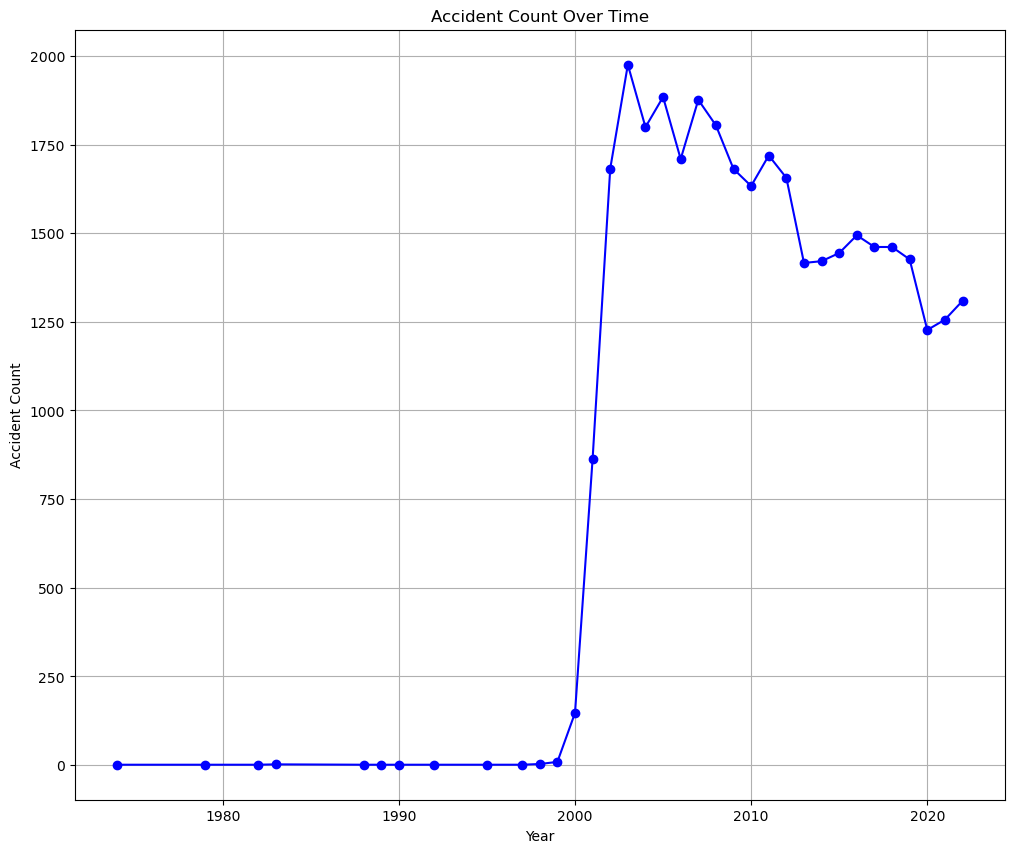

In [172]:
# To analyze accident counts
#checking accident trends
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'], errors='coerce')
#creating the column year
aviation_data['Year'] = aviation_data['Event.Date'].dt.year
#checking the years and the count of accidents
accident_trends = aviation_data.groupby('Year').size().reset_index(name='Accident_Count')
#plotting a graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.plot(accident_trends['Year'], accident_trends['Accident_Count'], marker='o', linestyle='-', color='b')
plt.title('Accident Count Over Time')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()

In [167]:
#checking the top 5 aircraft models with accidents
accident_by_model = aviation_data.groupby('Model').size().reset_index(name='Accident_Count')

# Sort by the number of accidents in descending order to highlight models with the most accidents
aircraft_model_sorted = accident_by_model.sort_values(by='Accident_Count', ascending=False)

# Display top 5 models with the most accidents
aircraft_model_sorted.head()

,Model,Accident_Count
146,172,784
107,152,425
184,172S,352
179,172N,348
220,182,303


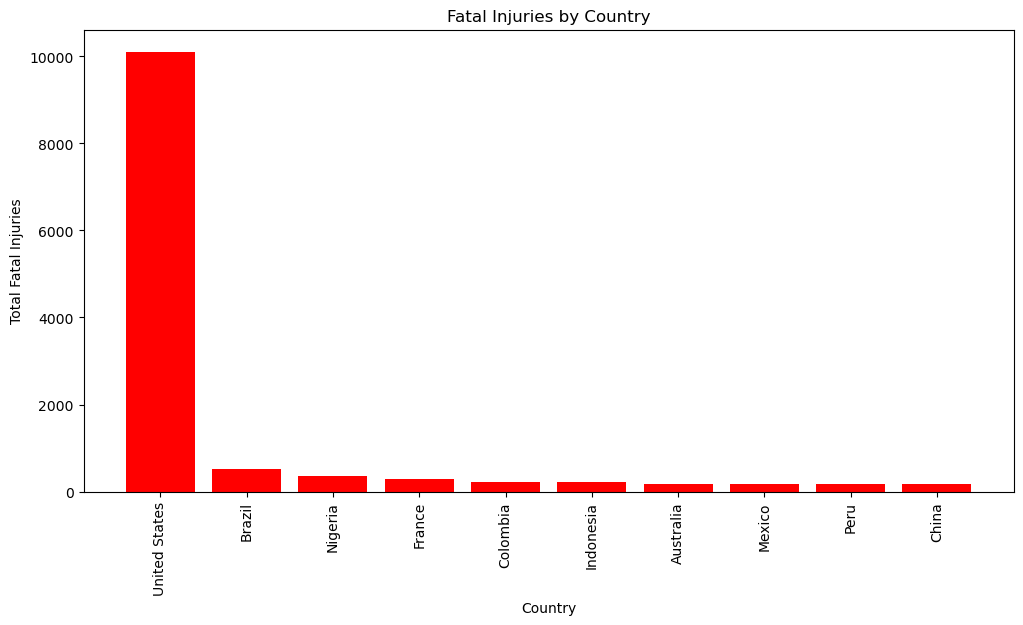

In [194]:
#checking the fatal accidents by country
injuries_by_country = aviation_data.groupby('Country')['Total.Fatal.Injuries'].sum().reset_index()

#sorting injuries by fatality
injuries_by_country_sorted = injuries_by_country.sort_values(by='Total.Fatal.Injuries', ascending=False)

# Plot fatal injuries by 10 top countries
top_countries = injuries_by_country_sorted.head(10)  # Top 10 countries
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country'], top_countries['Total.Fatal.Injuries'], color='red')
plt.xlabel('Country')
plt.ylabel('Total Fatal Injuries')
plt.title('Fatal Injuries by Country')
plt.xticks(rotation=90)
plt.show()

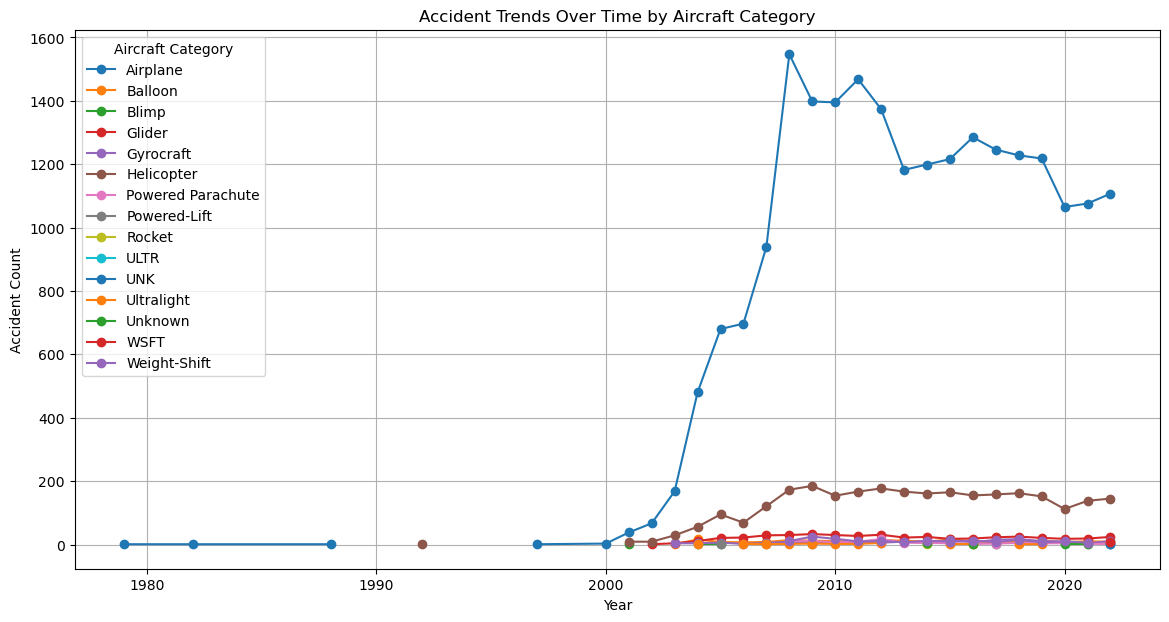

In [196]:
#checking accidents by year and aircraft type
accidents_by_year_aircraft_type = aviation_data.groupby(['Year', 'Aircraft.Category']).size().reset_index(name='Accident_Count')
#using pivot to reshape the data
accidents_by_year_aircraft_type_pivot = accidents_by_year_aircraft_type.pivot(index='Year', columns='Aircraft.Category', values='Accident_Count')
# Plot accident trends over time for each aircraft category
accidents_by_year_aircraft_type_pivot.plot(kind='line', figsize=(14, 7), marker='o')
plt.title('Accident Trends Over Time by Aircraft Category')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.grid(True)
plt.legend(title='Aircraft Category')
plt.show()

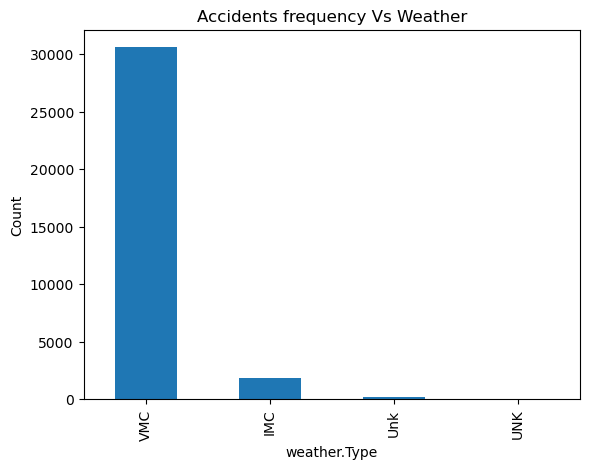

In [201]:
#checking on the relation between weather conditions and accidents
aviation_data['Weather.Condition'].value_counts().plot(kind='bar')
plt.title('Accidents frequency Vs Weather')
plt.xlabel('weather.Type')
plt.ylabel('Count')
plt.show()

# Data Limitations
#### 1. Most of the columns had missing data and this limited the qulaity of the data
#### 2. Incomplete maintenance report this impoact the aircraft history
#### 3. Lack of differentiation between the human error and the mechanical error

# Recommendations
#### 1. Ensure all critical fields are filled, and efforts should be made to gather missing data during the investigation phase.
#### 2. Establish clear data standards for how fields like aircraft types, accident causes, and severity classifications should be recorded
#### 3. Improve the accuracy and precision of geographical data (e.g., latitude and longitude) to facilitate more effective spatial analysis of accident hotspots.